# Clase 12: El método de bisección.

Empezaremos ahora en forma con los métodos numéricos. Nuestra primera discusión será sobre la solución de ecuaciones de una variable.

En muchos casos de interés queremos resolver una ecuación de una variable y la solución no se puede obtener de forma analítica. Por ejemplo al calcular las bandas de energía en un sólido de una dimensión se resuelve la siguiente ecuación

$$
f(z) = \cos(z) - \frac{\sin(z)}{z}
$$

La energía permitida satisface $-1 \leq f(z) \leq 1$. Entonces para encontrar las bandas de energía basta encontrar los lugares que satisfacen $f(z) = \pm 1$. Pero no es posible hacerlo de forma analítica.

Este tipo de problemas se pueden reducir a encontrar dónde una función es cero. Veremos algunas técnicas para lograrlo.

## Método de bisección

Consiste en partir un intervalo en dos y determinar en cual de los subintervalos se encuentra el cero que buscamos. Esto se hace repetidamente. Se puede aplicar a problemas más allá de los numéricos, para realizar búsquedas en listas ordenadas. El algoritmo (como todos los de esta clase) es de orden $\mathcal{O}(\log)$.

0. Escogemos $a$ < $b$ tal que $f(a)f(b) < 0$ y calculamos $p_1 = a + \frac{a + b}{2}$

1. Si $f(p_1) = 0$ terminamos.

2. Si $f(p_1)f(a) > 0$ entonces escogemos un nuevo $a = p_1$. Si $f(p_1)f(a) < 0$ entonces escogemos un nuevo $b = p_1$. Repetimos desde el paso 0.

In [125]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    for i in range(N):
        p = a + (b - a)/2
        print(p)
        if abs(f(p)) < epsilon:
            print("Cero en", p, "encontrado después de", i, "iteraciones.")
            return p
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
    print("No se encontró el cero después de", N, "iteraciones.")

In [41]:
import numpy as np

In [42]:
def func(x):
    return np.cos(x) - np.sin(x)/x - 1

In [43]:
import matplotlib.pyplot as plt

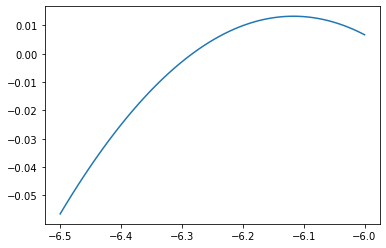

In [44]:
x = np.linspace(-6.5, -6, 100)
plt.plot(x, func(x))

In [45]:
func(-6.5)

-0.056507757054717334

In [46]:
func(-6.1)

0.013131144060960942

In [47]:
biseccion(func, -6.5, -6.1, 0.0001)

-6.3
-6.199999999999999
-6.25
-6.275
-6.2875
-6.28125
-6.284375
-6.2828125
Cero en -6.2828125 encontrado después de 7 iteraciones.


-6.2828125

Como condición para declarar el éxito hemos escogido que la función sea cercana a cero. Esto no necesariamente quiere decir que $p$ sea cercano a la verdadera raíz necesariamente. Por eso uno podría requerir

$$
|p_n - p_{n-1}| < \epsilon
$$

o mejor aún

$$
\frac{|p_n - p_{n-1}|}{|p_n|} < \epsilon
$$

In [127]:
def biseccion(f, a, b, epsilon, N=1000000):

    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(p - pp)/abs(p) < epsilon:
            return p
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
    print("No se encontró el cero después de", N, "iteraciones.")

In [62]:
biseccion(func, -6.5, -6.1, 0.0001)

-6.283203125

Nota: En vez de $a + (b - a)/2$ uno podría escribir $(a + b)/2$ que tiene menos operaciones. Sin embargo esta segunda opción es más suceptible a errores de redondeo ya que la primera va modificando cada vez menos un resultado que va siendo cada vez una mejor aproximación.

**Teorema**: El método de bisección genera una sucesión $\{p_n\}$ convergente a $p$ con

$$
|p_n - p| \leq \frac{b - a}{2^n}
$$

Para demostrarlo note que al $n$-ésimo paso

$$
(b_n - a_n) = \frac{1}{2^n}(b - a)
$$

Pero además

$$
|p_n - p| \leq (b_n - a_n)
$$

ya que tanto $p_n$ como $p$ están contenidos en el intervalo $[a_n, b_n]$. 

En el problema que resolvimos arriba, supongamos que queremos encontrar el cero con una precisión mejor que el $0.01\%$. Entonces despejamos 

$$
0.0001\times 6 = \frac{1}{2^n}(-6.1 + 6.5)
$$

In [54]:
np.log((-6.1+6.5)/(6*0.0001))/np.log(2)

9.380821783940931

## Iteración de punto fijo

el método de bisección garantiza que llega al cero de la función pero hay métodos más rápidos. Estos se basan en la solución de un problema relacionado, el de buscar un punto $p$ para una función $g(x)$ tal que $g(p) = p$ (llamado punto fijo de la función).

Claramente estos problemas son lo mismo que buscar $f(x) = 0$ con $f(x) = x - g(x)$ o incluso $f(x) = x - 3g(x)$ o infinitas otras opciones.

**Teorema**: 

* Si $g \in C[a,b]$ tal que $g(x) \in [a,b]$ para todo $x \in [a,b]$, entonces $g$ tiene al menos un punto fijo en $[a,b]$.

* Si $|g'(x)| \leq k$ con $0<k < 1$ para todo $x \in [a,b]$ entonces ese punto fijo es único.

Si $g(a) = a$ o $g(b) = b$ terminamos, de otra manera $g(a) > a$ y $g(b) < b$ y entonces se reduce a demostrar que $h(x) = x - g(x)$ tiene un cero en $[a,b]$, lo que es garantizado por el teorema del valor intermedio.

Supongamos que hay dos punttos fijos $p$ y $q$ diferentes. Por el teorema del valor medio

$$
\frac{g(p) - g(q)}{p - q} = g'(\xi)
$$

para algún $\xi \in [a, b]$, y entonces

$$
|p - q| = |g(p) - g(q)|  = |g'(\xi)||p - q| \leq k|p - q| < |p - q|
$$

lo que es una contradicción.

In [64]:
class MaxIterations(Exception):
    pass

In [75]:
def iter_func(g, po, epsilon, N=1000000):
    
    for i in range(N):
        p = g(po)
        if abs(p - po)/abs(po) < epsilon:
            return p, i
        else:
            po = p
    
    raise MaxIterations("No se encontró el punto fijo luego de", N, "iteraciones.")

Ejemplo: Encontremos el cero de la función $f(x) = x^3 + 4x^2 - 10$.

In [88]:
def g(x):
    return x - x**3 - 4*x**2 + 10

In [89]:
iter_func(g, 1.5, 0.0001)

OverflowError: (34, 'Result too large')

In [90]:
def g(x):
    return np.sqrt(10/x - 4*x)

In [91]:
iter_func(g, 1.5, 0.0001)

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


MaxIterations: ('No se encontró el punto fijo luego de', 1000000, 'iteraciones.')

In [93]:
def g(x):
    return (1/2)*np.sqrt(10 - x**3)

In [94]:
iter_func(g, 1.5, 0.0001)

(1.3652058502970472, 12)

In [95]:
def g(x):
    return np.sqrt(10/(4 + x))

In [96]:
iter_func(g, 1.5, 0.0001)

(1.365225594160525, 4)

In [97]:
def g(x):
    return x - (x**3 + 4*x**2 - 10)/(3*x**2 + 8*x)

In [98]:
iter_func(g, 1.5, 0.0001)

(1.3652300139161466, 2)

**Teorema**: Sea $g$ tal que satisface todas las condiciones del teorema anterior. Entonces para cualquier número $p_o \in [a, b]$, la secuencia definida por

$$
p_n = g(p_{n-1})
$$

converge al punto fijo.

Como $g(x) \in [a,b]$, la secuencia está toda contenida en $[a, b]$. Para cada $n$ tenemos

$$
|p_n - p| = |g(p_{n-1}) - g(p)| = |g'(\xi)||p_{n-1} - p| \leq k |p_{n-1} - p|\,,
$$

entonces por inducción se puede demostrar que

$$
|p_n - p| \leq k^n |p_o - p|\,,
$$

a medida que $n \rightarrow \infty$ esta cantidad tiende a cero.

En los ejemplos de arriba, no todas las funciones cumplen las condiciones de este teorema.

Para usar este método con el propósito de encontrar una raíz, es necesario convertir el problema de la raíz a una función $g$ que satisfaga estas condiciones.

## Tareas

### Tarea 6.6

Use el método de bisección para encontrar un cero de la función 

$$
f(x) = 1 - \cos(x) -\frac{\sin(x)}{x}
$$

entre $-6.5$ y $-6.0$. Grafique el error relativo requerido al calcular el cero en función del número de iteraciones que necesita el método para converger. Compare con la cota teórica.

In [102]:
def func(x):
    return 1 - np.cos(x) - np.sin(x)/x

In [162]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    pp = a
    for i in range(N):
        p = a + (b - a)/2
        if abs(pp - p)/abs(p) < epsilon:
            return p, i
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
        pp = p
        
    raise MaxIterations("No se encontró el cero después de", N, "iteraciones.")

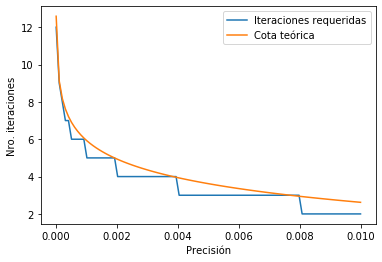

In [163]:
errors = np.linspace(0.00001, 0.01, 100)
iters=[biseccion(func, -6.5, -6.1, e)[1] for e in errors]
plt.plot(errors, iters, label='Iteraciones requeridas')
plt.plot(errors, np.log((-6.1+6.5)/(6.5*errors))/np.log(2), label = 'Cota teórica')
plt.xlabel('Precisión')
plt.ylabel('Nro. iteraciones')
plt.legend()

### Tarea 6.7

Encuentre un cero de la función

$$
f(x) = 1 - \cos(x) -\frac{\sin(x)}{x}
$$

entre $-6.4$ y $-6.0$ usando el método de iteración de punto fijo con un error relativo de $0.001$. Verifique que su función $g$ satisface las condiciones necesarias para la convergencia del método.

**Solución:** Defino

$$
g(x) = x - 1 + \cos(x) + \frac{\sin(x)}{x}
$$

tal que

$$
g'(x) = 1 - \sin(x) -\frac{\sin(x)}{x^2} + \frac{\cos(x)}{x}
$$

Text(0, 0.5, '$g(x)$')

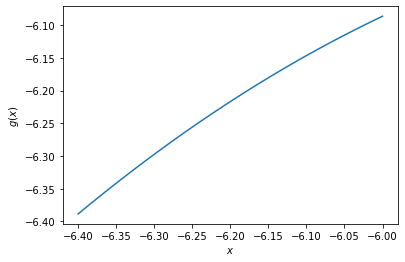

In [170]:
x = np.linspace(-6.4, -6.0, 100)
plt.plot(x, x - 1 + np.cos(x) + np.sin(x)/x)
plt.xlabel('$x$')
plt.ylabel('$g(x)$')

Text(0, 0.5, "$g'(x)$")

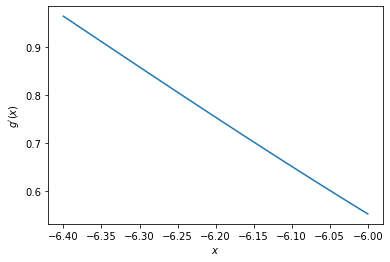

In [171]:
plt.plot(x, 1 - np.sin(x) - np.sin(x)/(x**2) + np.cos(x)/x)
plt.xlabel('$x$')
plt.ylabel("$g'(x)$")

Como la función cumple ambas condiiciones puedo usar el método

In [118]:
def g(x):
    return x - 1 + np.cos(x) + np.sin(x)/x

In [120]:
iter_func(g, -6.1, 0.0001)

(-6.28041799696385, 20)

### Tarea 6.8

Busque un ejemplo de una función tal que el método de bisección con la condición $|p_n - p_{n-1}|/|p_n| < \epsilon$ converge siempre a un valor que no es un cero de la función.

In [129]:
def f(x):
    if x <= 0.8:
        return 1
    else:
        return -1

In [131]:
biseccion(f, 0, 1, 0.00001)

0.7999954223632812

La función nunca es cero y aún así converge. Esto se debe a que es discontinua.

### Tarea 6.9

Encuentre una aproximación numérica para $(31)^{1/3}$ con un error relativo menor que $10^{-8}$ usando el método de bisección y el método de iteración de punto fijo. Compare el tiempo que tarda cada método.

In [136]:
def f(x):
    return (x**3 - 31)

biseccion(f, 0, 4, 10**(-8))

3.14138063788414

Text(0, 0.5, '$g(x)$')

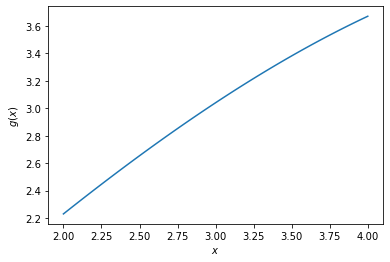

In [172]:
x = np.linspace(2,4, 100)
plt.plot(x, x - (x**3 - 31)/100)
plt.xlabel('$x$')
plt.ylabel('$g(x)$')

Text(0, 0.5, "$g'(x)$")

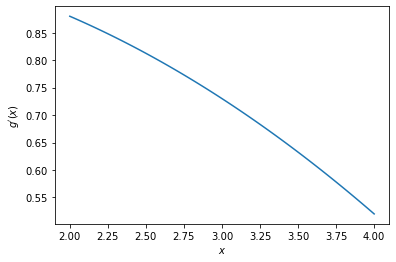

In [173]:
plt.plot(x, 1 - (3*x**2)/100)
plt.xlabel('$x$')
plt.ylabel("$g'(x)$")

In [143]:
def g(x):
    return x - (x**3 - 31)/100

In [145]:
def iter_func(g, po, epsilon, N=1000000):
    
    for i in range(N):
        p = g(po)
        if abs(p - po)/abs(po) < epsilon:
            return p
        else:
            po = p
    
    raise MaxIterations("No se encontró el punto fijo luego de", N, "iteraciones.")

In [146]:
iter_func(g, 3, 10**(-8))

3.1413805927839817

In [150]:
from time import time_ns

def medir_tiempo(func, *args):
    t1 = time_ns()
    func(*args)
    tf = time_ns() - t1
    return tf

In [151]:
medir_tiempo(biseccion, f, 0, 4, 10**(-8))

26000

In [152]:
medir_tiempo(iter_func, g, 3, 10**(-8))

23000

Son del mismo orden. En realidad el tiempo que tarda depende mucho del punto inicial para el método de iteración de punto fijo y del intervalo inicial para el método de bisección, así que no hay un modo claro de decidir entre ambos métodos.

### Tarea 6.10

Encuentre una aproximación numérica para $(31)^{1/3}$ usando el método de bisección. Grafique el tiempo requerido para ese cálculo en función del error relativo. Escoja errores relativos muy pequeños para que el computador tarde un tiempo moderado en el cálculo.

In [165]:
def f(x):
    return (x**3 - 31)

In [ ]:
from time import time_ns

def medir_tiempo(func, *args):
    t1 = time_ns()
    func(*args)
    tf = time_ns() - t1
    return tf

In [166]:
exps = np.linspace(-20,-10,10)
errors = 10**exps
tiempos = np.array([medir_tiempo(biseccion, f, 0, 4, e) for e in errors])

In [167]:
tiempos

array([48000, 42000, 41000, 41000, 40000, 36000, 34000, 31000, 29000,
       25000])

Text(0, 0.5, 'Tiempo (ns)')

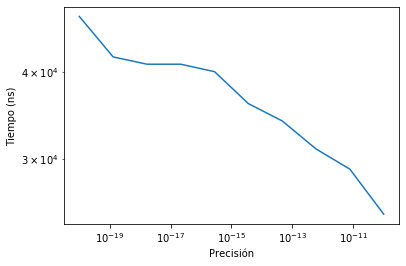

In [169]:
plt.loglog(errors, tiempos)
plt.xlabel('Precisión')
plt.ylabel('Tiempo (ns)')